In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [52]:
# сразу напишем код функции, которая будет вычислять все нужные метрики

def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

In [81]:
# импорт нужных библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes  # подключаем датасет из sklearn
from sklearn.model_selection import train_test_split
import warnings
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

warnings.filterwarnings('ignore')

In [147]:
dtf = pd.read_csv('E:/git/Data-Analysis101/datasets/laptopPrices/laptop_prices.csv', sep=',',quotechar='"')
dtf.head()


,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [153]:
dtf.describe()

,Company,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,...,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,6.460392,2.582745,15.022902,8.440784,4.814118,2.040525,1134.969059,1.567059,1900.043922,1073.904314,...,0.013333,0.953725,2.302980,50.250980,444.517647,176.069020,2.263529,1.684706,2.036863,50.439216
std,4.096247,1.247925,1.429470,5.097809,1.034319,0.669196,700.752504,0.944710,493.346186,283.883940,...,0.114743,0.213864,0.503846,16.982392,365.537726,415.960655,1.045080,0.734469,0.925510,26.471365
min,0.000000,0.000000,10.100000,2.000000,0.000000,0.690000,174.000000,0.000000,1366.000000,768.000000,...,0.000000,0.000000,0.900000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,14.000000,4.000000,5.000000,1.500000,609.000000,1.000000,1920.000000,1080.000000,...,0.000000,1.000000,2.000000,41.000000,256.000000,0.000000,1.000000,2.000000,2.000000,31.000000
50%,7.000000,3.000000,15.600000,8.000000,5.000000,2.040000,989.000000,1.000000,1920.000000,1080.000000,...,0.000000,1.000000,2.500000,52.000000,256.000000,0.000000,3.000000,2.000000,2.000000,49.000000
75%,10.000000,3.000000,15.600000,8.000000,5.000000,2.310000,1496.500000,3.000000,1920.000000,1080.000000,...,0.000000,1.000000,2.700000,62.000000,512.000000,0.000000,3.000000,2.000000,3.000000,55.000000
max,18.000000,5.000000,18.400000,64.000000,8.000000,4.700000,6099.000000,3.000000,3840.000000,2160.000000,...,1.000000,2.000000,3.600000,92.000000,2048.000000,2048.000000,3.000000,3.000000,3.000000,109.000000


In [12]:
for index in dtf.columns:
    print(index)

Company
Product
TypeName
Inches
Ram
OS
Weight
Price_euros
Screen
ScreenW
ScreenH
Touchscreen
IPSpanel
RetinaDisplay
CPU_company
CPU_freq
CPU_model
PrimaryStorage
SecondaryStorage
PrimaryStorageType
SecondaryStorageType
GPU_company
GPU_model


In [150]:
dtf = dtf.drop(['Product'], axis=1)
#dtf = dtf.drop(['CPU_model'], axis=1)

# Уберём несущественное поле с названием ноутбука

In [149]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

enc_ = OrdinalEncoder()

onc_ = OneHotEncoder()

dtf[['Company']] = enc_.fit_transform(dtf[['Company']])
dtf[['TypeName']] = enc_.fit_transform(dtf[['TypeName']])
dtf[['OS']] = enc_.fit_transform(dtf[['OS']])
dtf[['Screen']] = enc_.fit_transform(dtf[['Screen']])
dtf[['CPU_company']] = enc_.fit_transform(dtf[['CPU_company']])
dtf[['CPU_model']] = enc_.fit_transform(dtf[['CPU_model']])
dtf[['PrimaryStorageType']] = enc_.fit_transform(dtf[['PrimaryStorageType']])
dtf[['SecondaryStorageType']] = enc_.fit_transform(dtf[['SecondaryStorageType']])
dtf[['GPU_company']] = enc_.fit_transform(dtf[['GPU_company']])
dtf[['GPU_model']] = enc_.fit_transform(dtf[['GPU_model']])


#dtf[onc_.categories_[0]] = onc_.fit_transform(dtf[['Touchscreen']]).toarray()

dtf[['Touchscreen']] = enc_.fit_transform(dtf[['Touchscreen']])
dtf[['IPSpanel']] = enc_.fit_transform(dtf[['IPSpanel']])
dtf[['RetinaDisplay']] = enc_.fit_transform(dtf[['RetinaDisplay']])

In [38]:
dtf.head()

,Company,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,...,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,1.0,4.0,13.3,8,8.0,1.37,1339.69,3.0,2560,1600,...,1.0,1.0,1.0,2.3,128,0,3.0,2.0,2.0,Iris Plus Graphics 640
1,1.0,4.0,13.3,8,8.0,1.34,898.94,3.0,1440,900,...,0.0,0.0,1.0,1.8,128,0,0.0,2.0,2.0,HD Graphics 6000
2,7.0,3.0,15.6,8,4.0,1.86,575.00,1.0,1920,1080,...,0.0,0.0,1.0,2.5,256,0,3.0,2.0,2.0,HD Graphics 620
3,1.0,4.0,15.4,16,8.0,1.83,2537.45,3.0,2880,1800,...,1.0,1.0,1.0,2.7,512,0,3.0,2.0,0.0,Radeon Pro 455
4,1.0,4.0,13.3,8,8.0,1.37,1803.60,3.0,2560,1600,...,1.0,1.0,1.0,3.1,256,0,3.0,2.0,2.0,Iris Plus Graphics 650


In [14]:
dtf['Price_euros']

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1270     638.00
1271    1499.00
1272     229.00
1273     764.00
1274     369.00
Name: Price_euros, Length: 1275, dtype: float64

In [105]:
dtf.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight', 'Price_euros',
       'Screen', 'ScreenW', 'ScreenH', 'Touchscreen', 'IPSpanel',
       'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

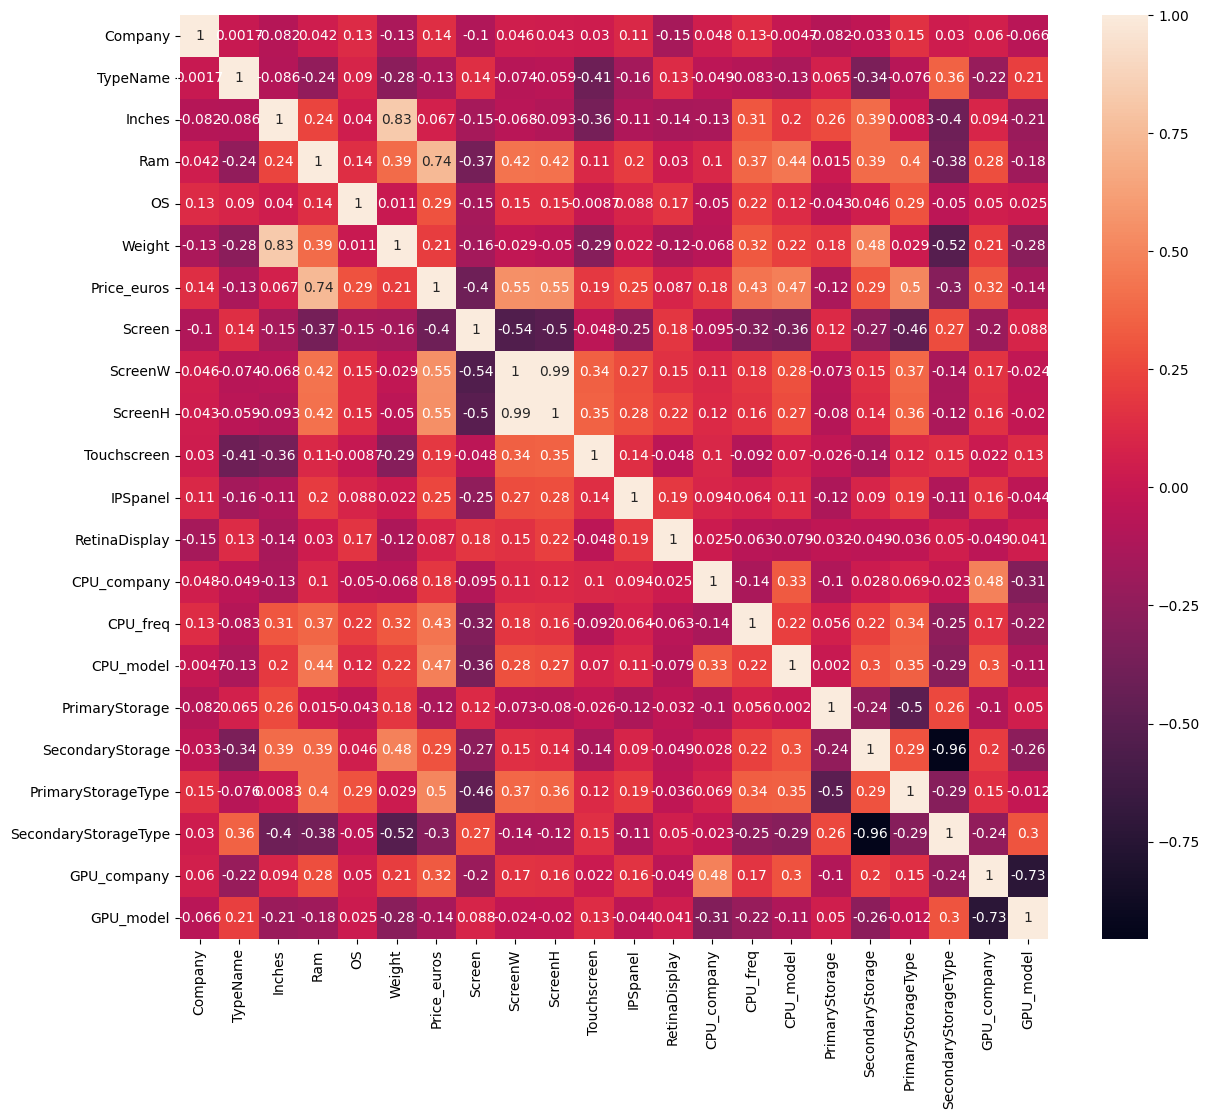

In [151]:
# Тепловая карта
# Построение тепловой карты для проверки корреляции.
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.

plt.figure(figsize=(14,12))

sns.heatmap(dtf.corr(numeric_only = True), annot=True)
plt.show()

# Из heatmap можно выделить основные признаки больше всего влияющие на цену: Ram, ScreenW, ScreenH,CPU_freq,CPU_model, GPU_company

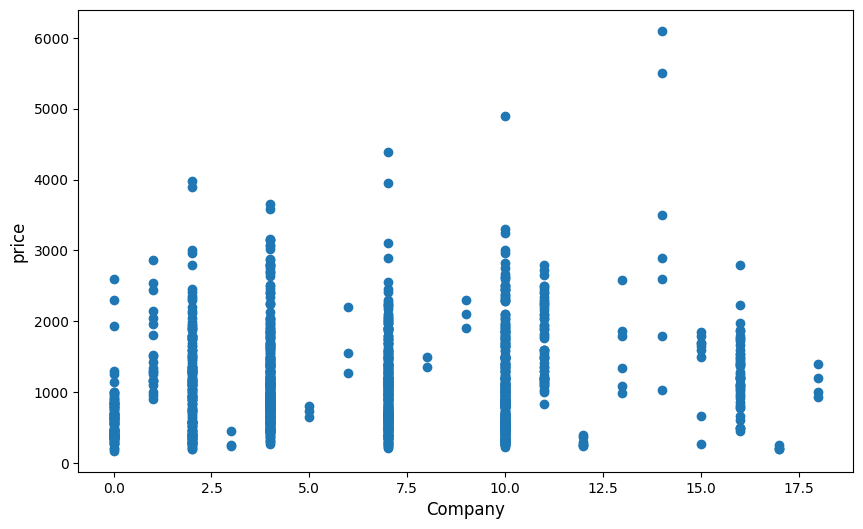

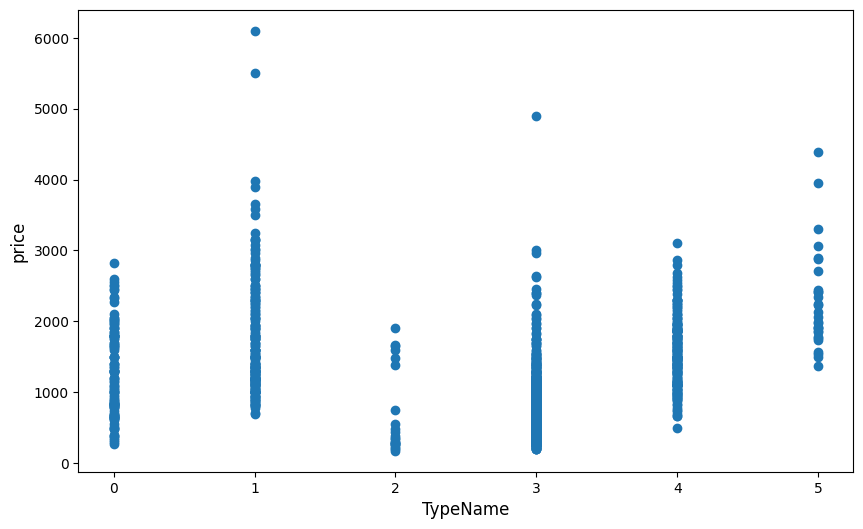

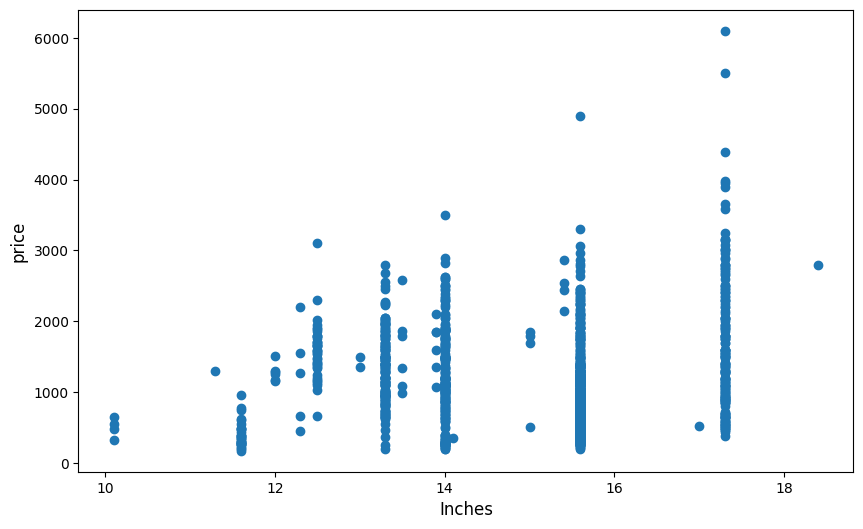

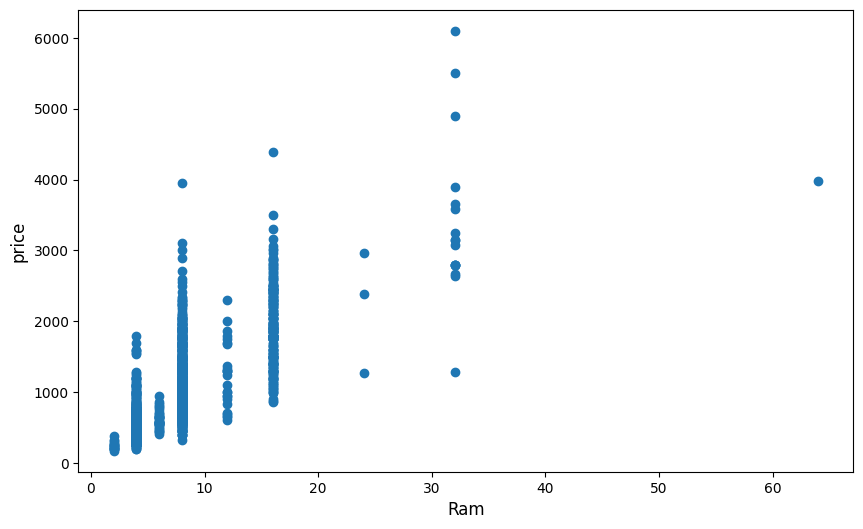

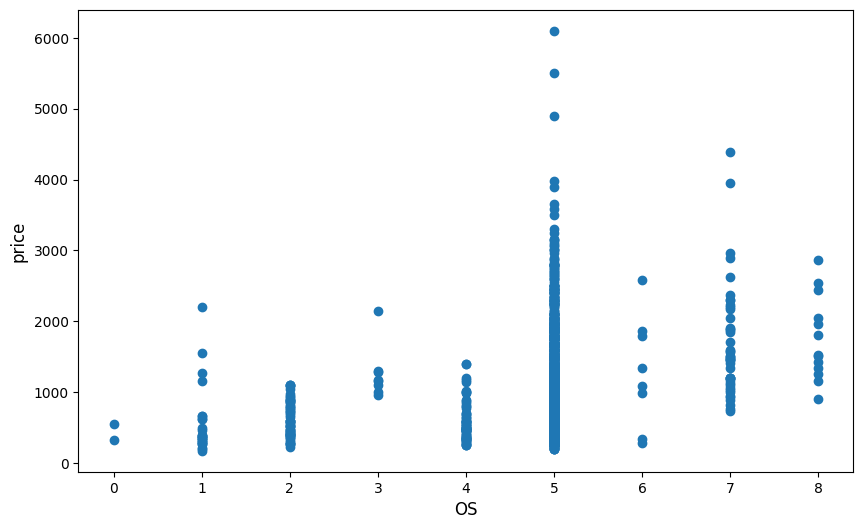

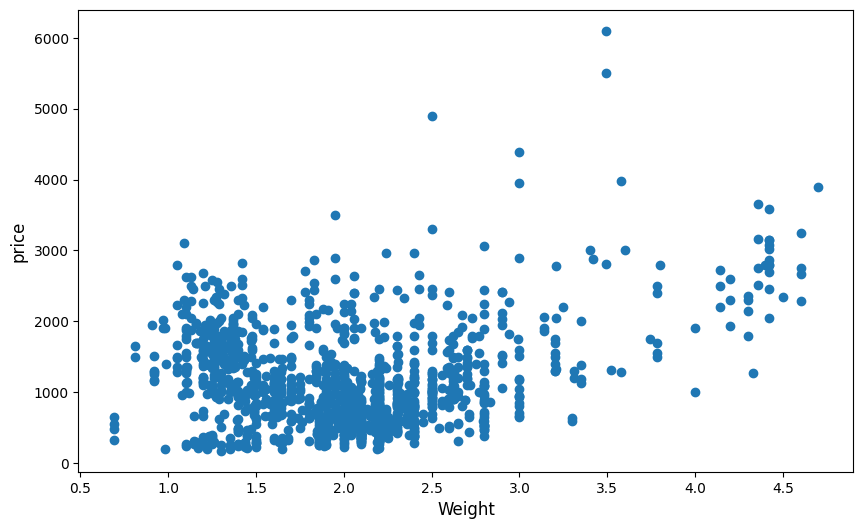

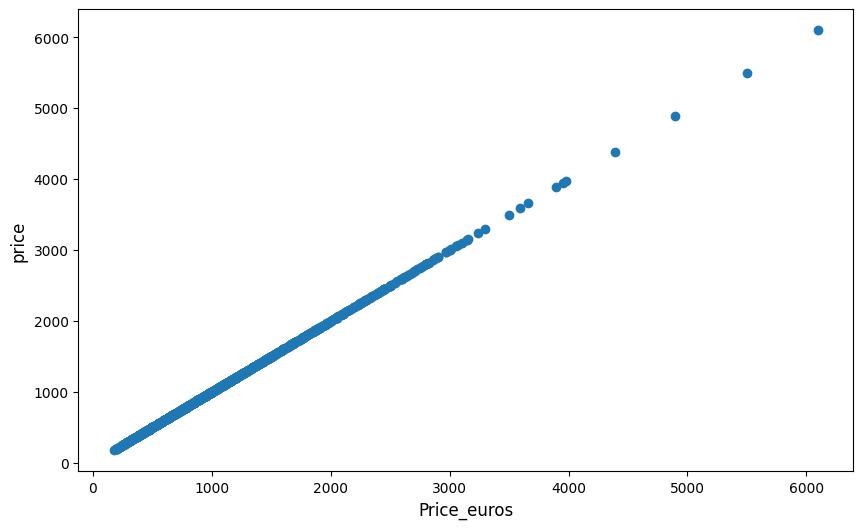

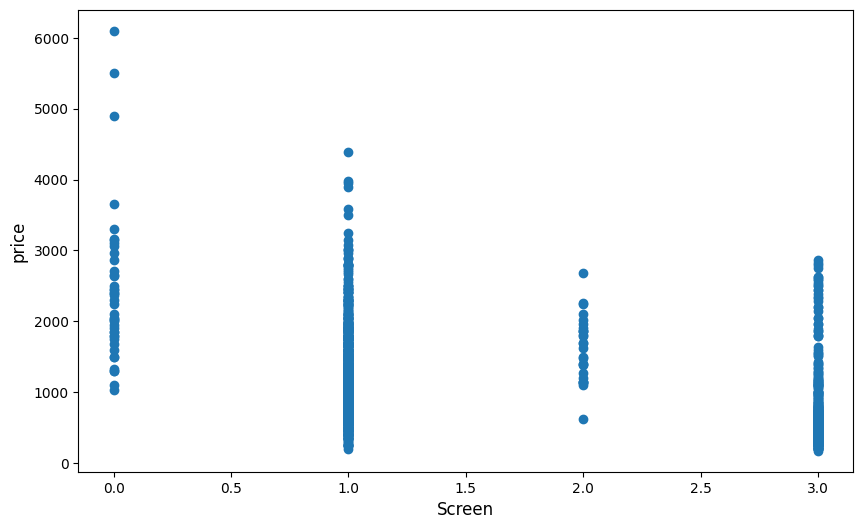

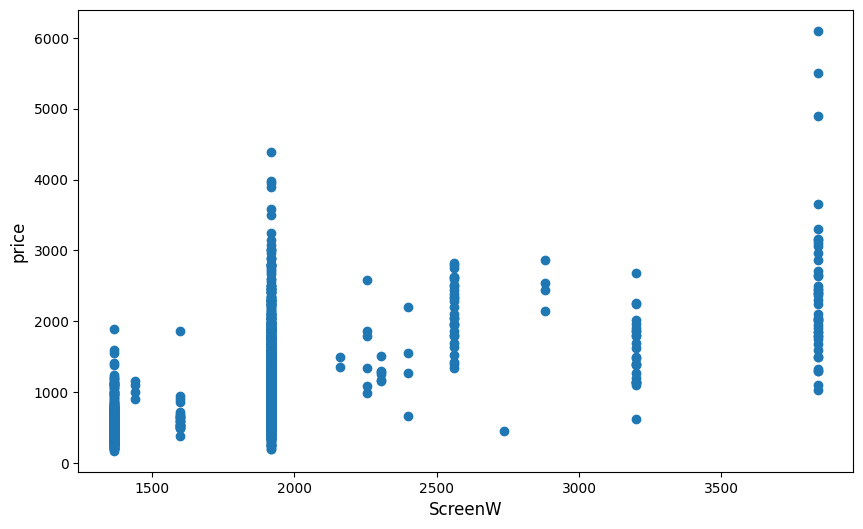

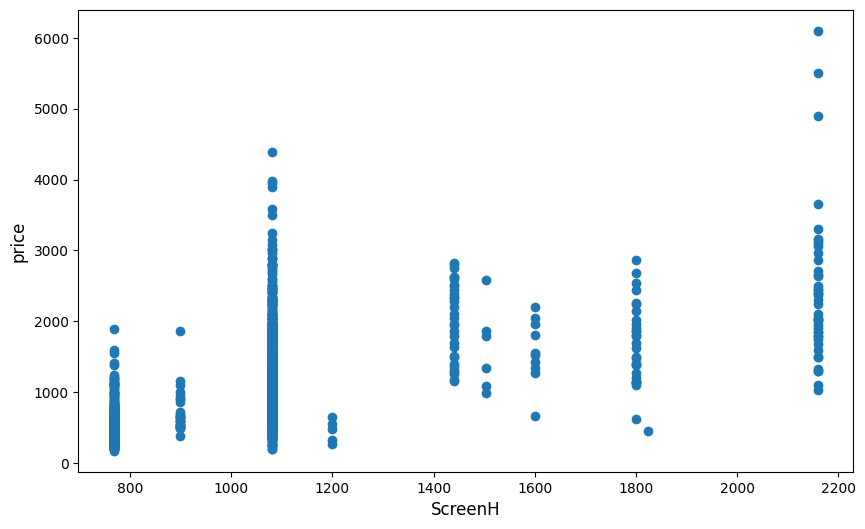

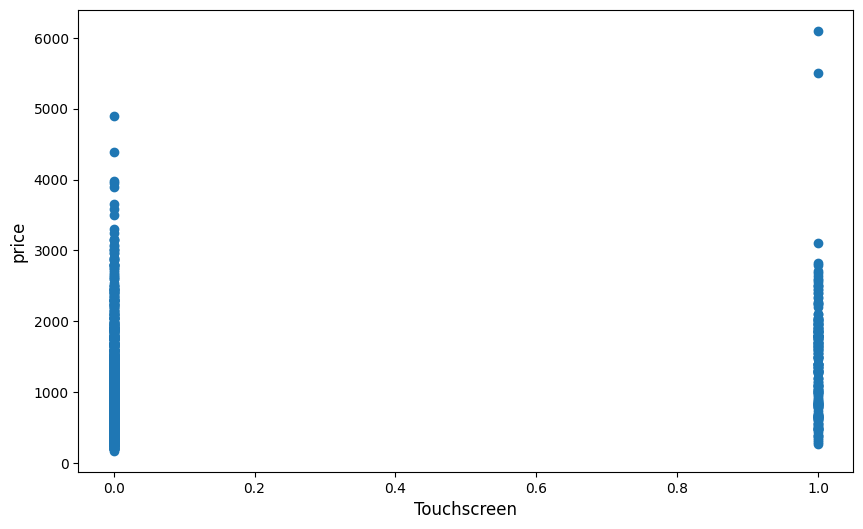

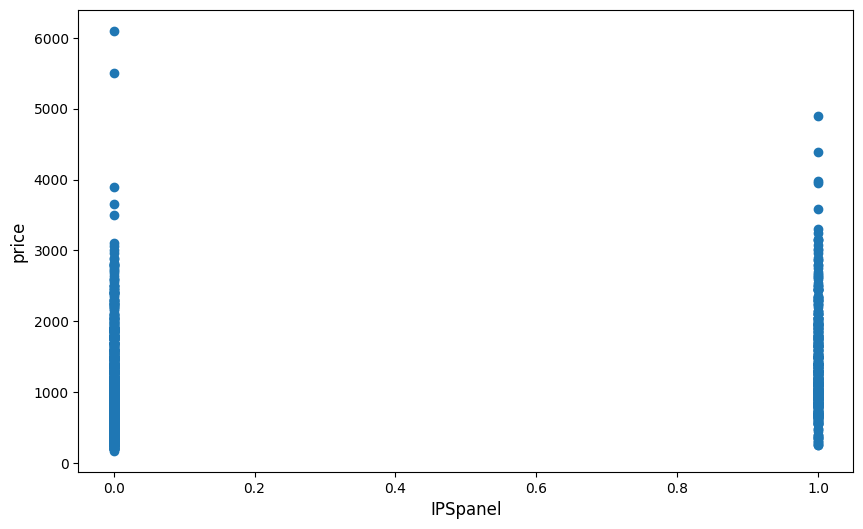

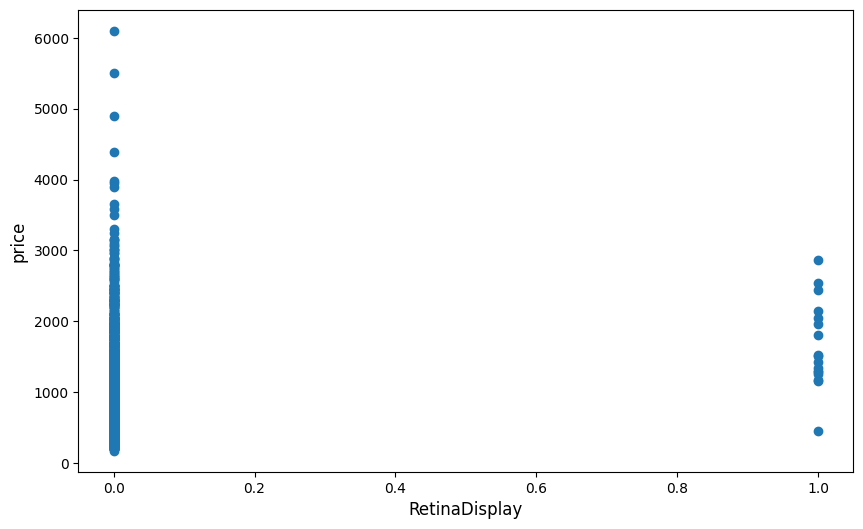

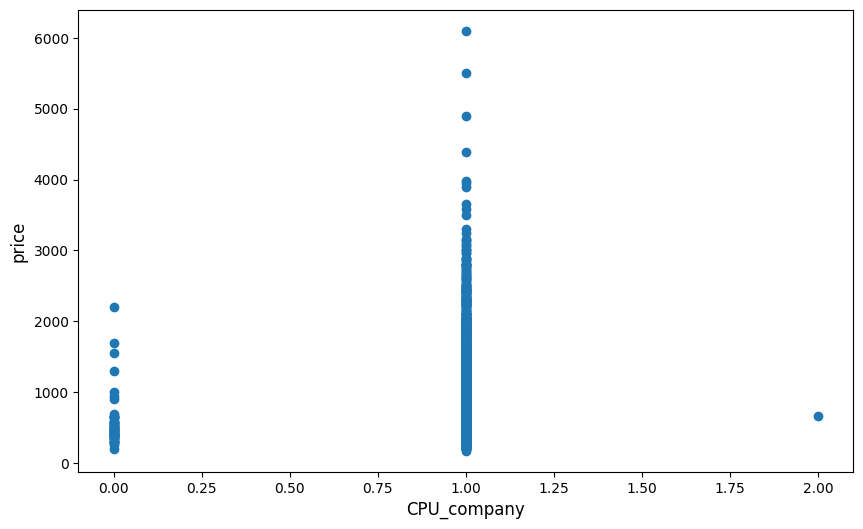

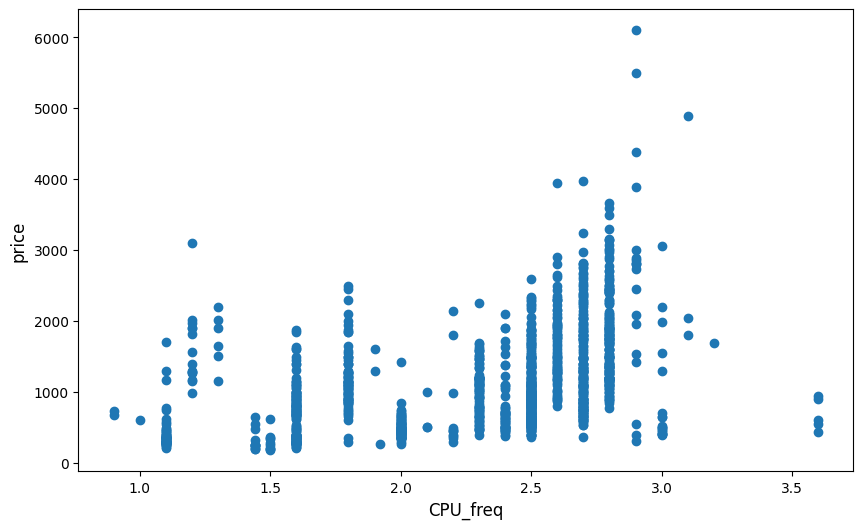

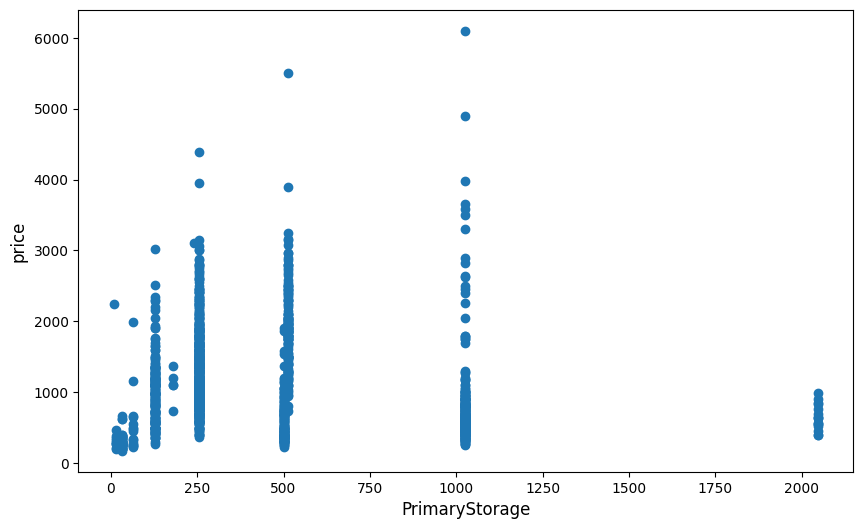

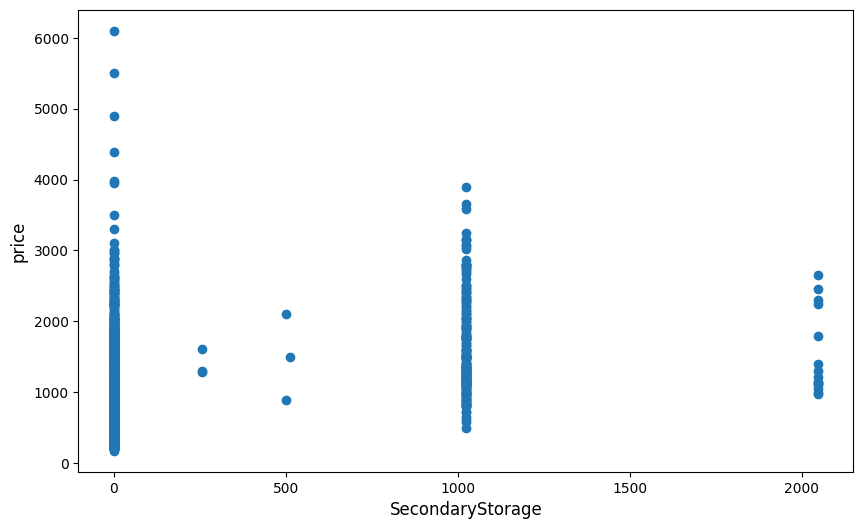

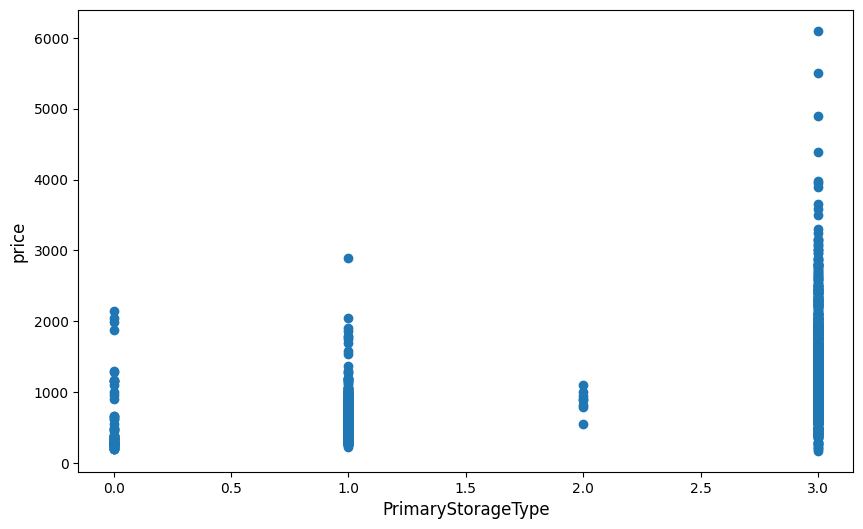

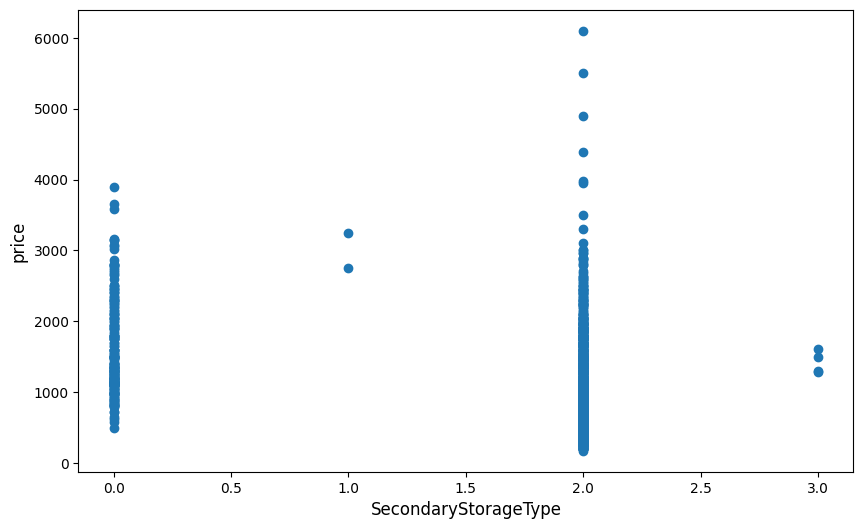

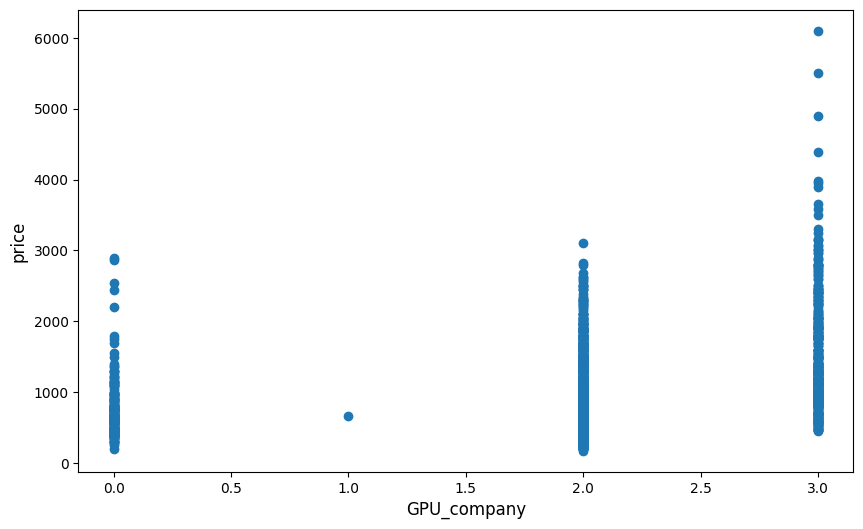

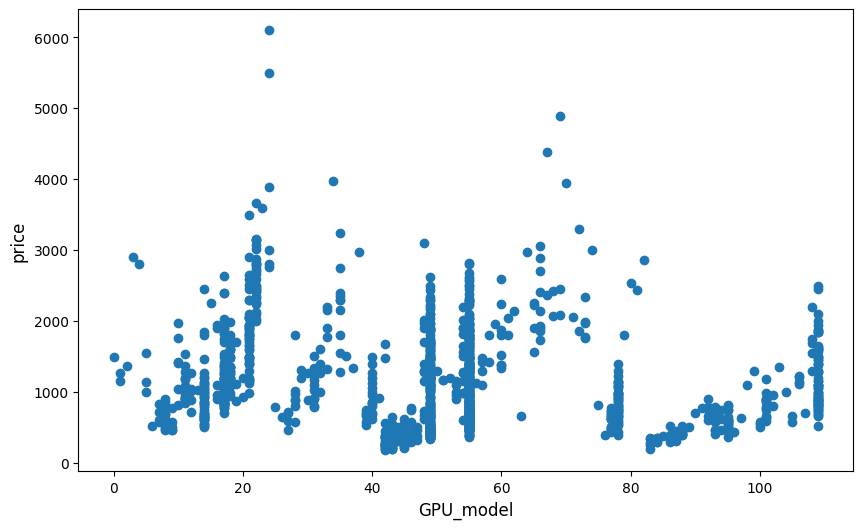

In [42]:
# нарисуем диаграммы рассеяния, чтобы лучше понять, как признаки (фичи) связаны с целевой переменной

for index in dtf.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(dtf[index], dtf['Price_euros'])
    plt.ylabel('price', size=12)
    plt.xlabel(index, size=12)
    plt.show()

In [113]:
# подготавливаем датасет к обучению

X = dtf.drop(['Price_euros'], axis=1)
y = dtf['Price_euros']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (1275, 21) | y shape: (1275,) 


In [138]:
# делим датасет на трейн и тест

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=14)

In [101]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
modelLR = LinearRegression()

# Fit the model to the data
modelLR.fit(X_train, y_train)

# Predict the response for a new data point
y_pr_LR = modelLR.predict(X_test)

In [102]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)


RMSE:  359.9172
  R2: 0.7449
 Adjusted R2: 0.7323
 Cross Validated R2: 0.6711


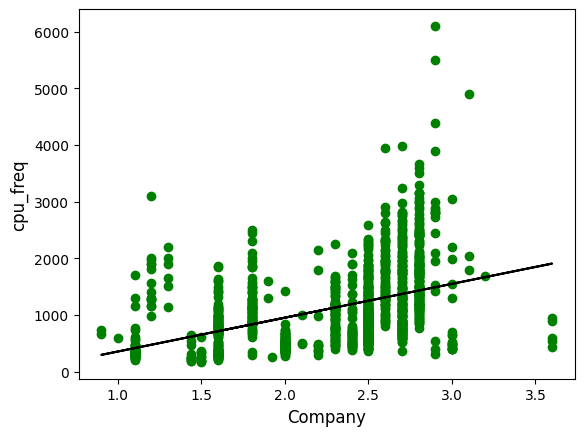

In [106]:
# попробуем отрисовать, как выглядит наша линейная регрессия

X2 = dtf['CPU_freq'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Price_euros'].values


model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('cpu_freq', size=12)
plt.xlabel('Company', size=12)
plt.show()



# Полиномиальная регрессия

In [119]:

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=20)

In [120]:
# Create a linear regression model
modelPR = LinearRegression()

# Fit the model to the data
modelPR.fit(X_p_train, y_p_train)

# Predict the response for a new data point
y_pr_PR = modelPR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  3369153.4923
  R2: -22380783.7934
 Adjusted R2: 696948.892
 Cross Validated R2: -9104821.2302


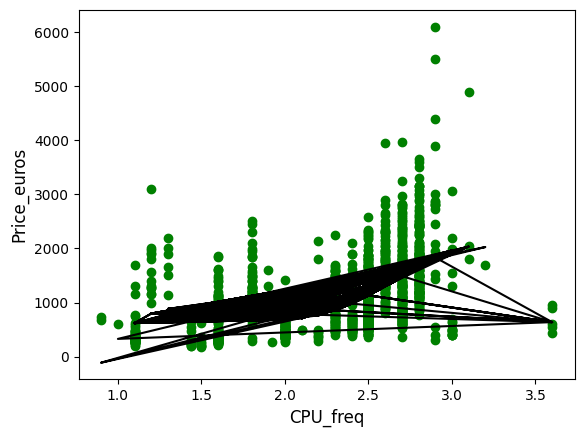

In [121]:
X2 = dtf['CPU_freq'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Price_euros'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)


plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Price_euros', size=12)
plt.xlabel('CPU_freq', size=12)
plt.show()


# Регрессия дерева принятия решений


In [122]:
from sklearn.tree import DecisionTreeRegressor

# Create a stepwise regression model
modelDT = DecisionTreeRegressor()

# Fit the model to the data
modelDT.fit(X_train, y_train)

# Predict the response for a new data point
y_dt_pred = modelDT.predict(X_test)

In [123]:
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  408.0323
  R2: 0.6721
 Adjusted R2: 0.6559
 Cross Validated R2: 0.6804


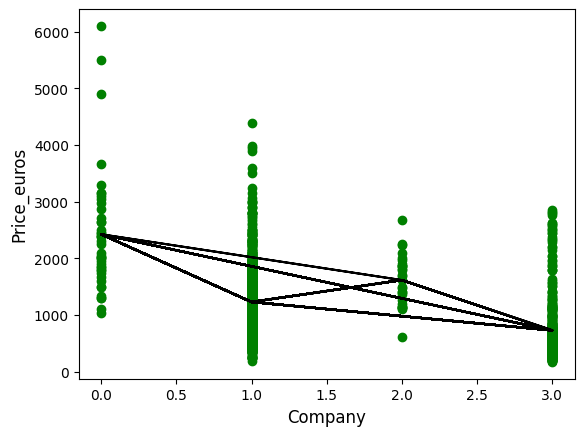

In [144]:
# попробуем отрисовать, как выглядит наша линейная регрессия

X2 = dtf['Screen'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Price_euros'].values


model2 = DecisionTreeRegressor()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Price_euros', size=12)
plt.xlabel('Company', size=12)
plt.show()



# Регрессия случайного леса
Таргет

In [140]:
from sklearn.ensemble import RandomForestRegressor

# Create a stepwise regression model
modelRF = RandomForestRegressor(n_estimators=500)

# Fit the model to the data
modelRF.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelRF.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  258.945
  R2: 0.8633
 Adjusted R2: 0.8565
 Cross Validated R2: 0.8021


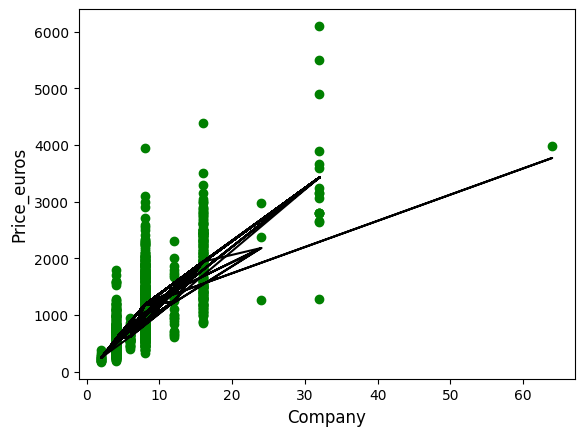

In [158]:
# одна из красивых визуализации регресии по признака количества оперативной памяти

X2 = dtf['Ram'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Price_euros'].values


model2 = RandomForestRegressor(n_estimators=500)
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Price_euros', size=12)
plt.xlabel('Company', size=12)
plt.show()



# Регрессия опорных векторов (SVR)


In [125]:
from sklearn.svm import SVR

# Create a support vector regression model
modelSVR = SVR(kernel='linear')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  383.6103
  R2: 0.7102
 Adjusted R2: 0.6959
 Cross Validated R2: 0.6427


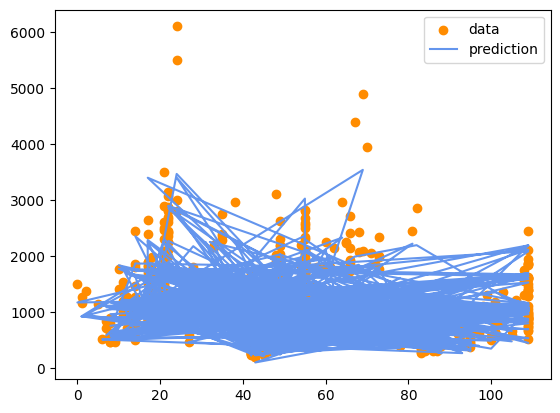

In [128]:
plt.scatter(X_train["GPU_model"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["GPU_model"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [129]:
from sklearn.svm import SVR

# Create a support vector regression model. Полиномиальное ядро
modelSVR = SVR(kernel='poly')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  659.1525
  R2: 0.1443
 Adjusted R2: 0.1021
 Cross Validated R2: 0.1325


# Регрессия ElasticNet

In [130]:
from sklearn.linear_model import ElasticNet

# Create an elastic net regression model
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the model to the data
modelEN.fit(X_train, y_train)

# Predict the response for a new data point
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  361.6702
  R2: 0.7424
 Adjusted R2: 0.7297
 Cross Validated R2: 0.6726


In [ ]:
plt.scatter(X_train["bp"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["bp"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()